## The weighted pair correlation function (wPCF)

The <i>weighted pair correlation function</i> (wPCF) is a spatial statistic that extends the standard pair correlation function to identify spatial relationships between two point populations, one of which is labelled with a continuous mark. For full details, see https://doi.org/10.1371/journal.pcbi.1010994 or https://doi.org/10.1017/S2633903X24000011.

In this tutorial, we briefly reproduce the example from Figure 3 of <i>Quantification of spatial and phenotypic heterogeneity in an agent-based model of tumour-macrophage interactions</i> (PLOS Computational Biology 19(3) https://doi.org/10.1371/journal.pcbi.1010994). We start by placing a line of points from population $A$ across the line $y = 0$, and a second population $B$ placed randomly across the domain. Population $B$ points are assigned a mark $m_i = y_i^2$

(<Figure size 1080x1620 with 2 Axes>, <Axes: >)

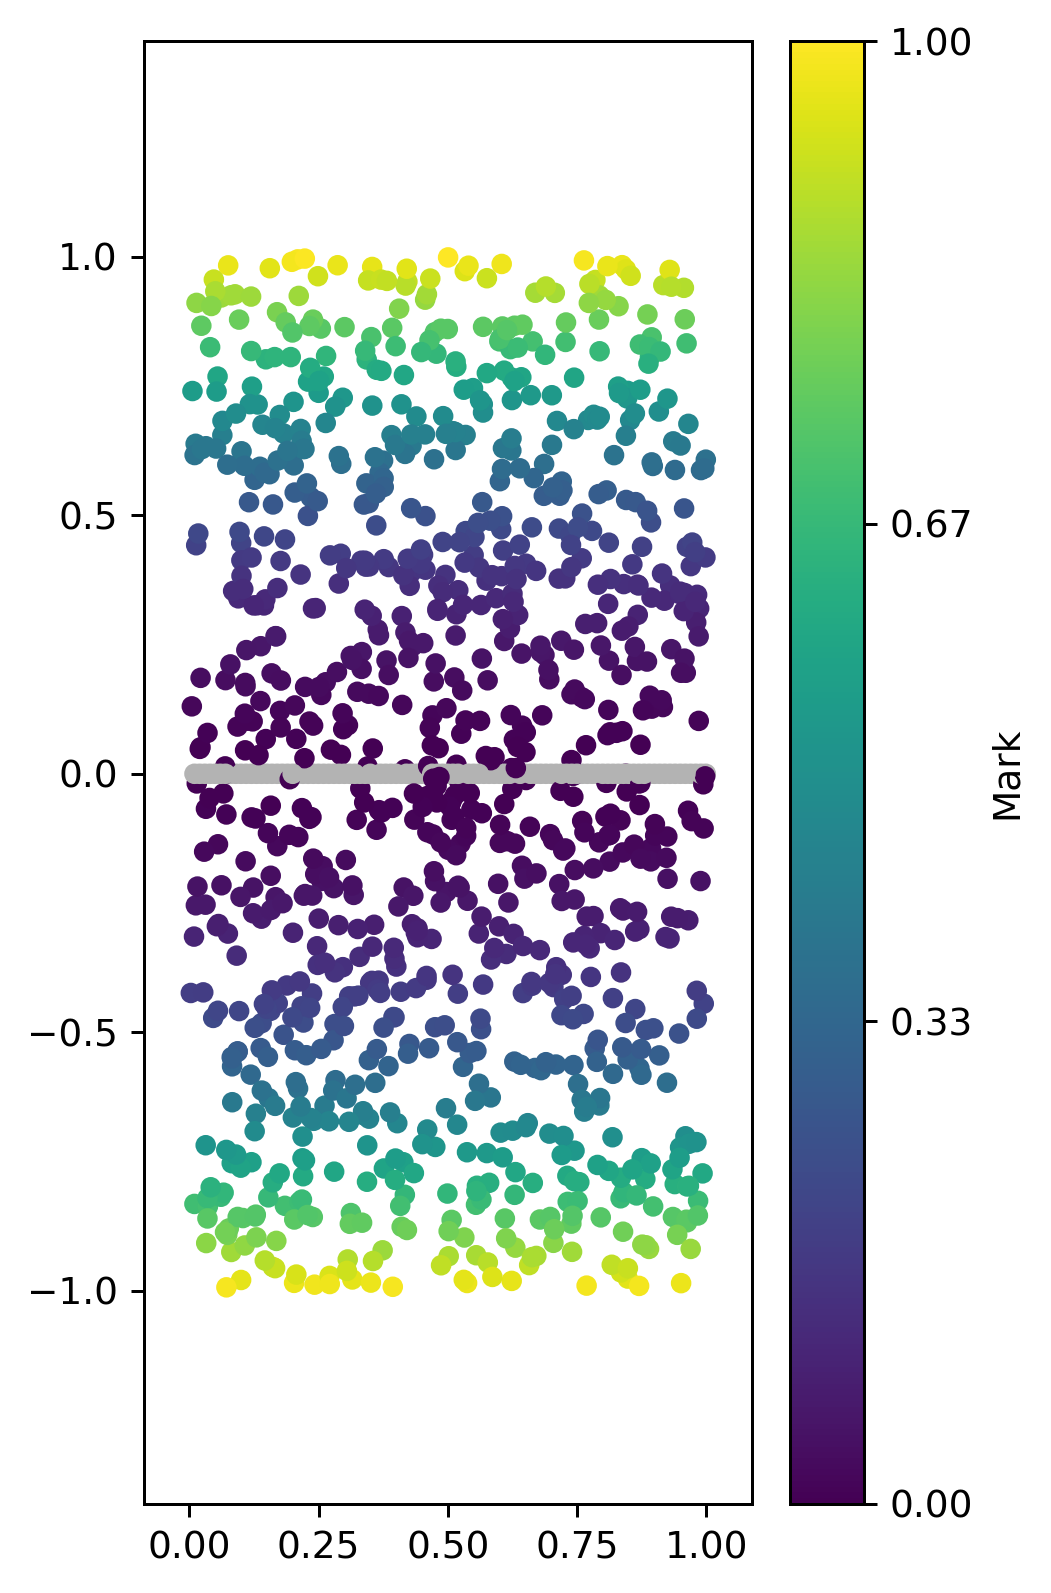

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import muspan as ms

# Define the number of points in populations A and B
N_A = 100
N_B = 1000

# Create population A - N_A points across the domain center
points_A = np.asarray([((v / N_A)+1e-6, 0) for v in np.linspace(1, N_A-1e-6, N_A)])

# Create population B - N_B points distributed via complete spatial randomness
points_B = np.random.rand(N_B, 2) * [1, 2] - [0, 1]

# Assign labels to population B points based on their y-coordinate squared
labels_B = points_B[:, 1] ** 2

# Create a domain for the wPCF example
domain = ms.domain('wPCF example')

# Add points to the domain
domain.add_points(points_B, 'B')
domain.add_points(points_A, 'A')

# Add labels to population B points
domain.add_labels('Mark', labels_B, add_labels_to='B')

# Visualize the domain with points colored by their mark
ms.visualise.visualise(domain, color_by='Mark', figure_kwargs={'figsize': (4, 6)})

In [8]:
# Query population A from the domain
popA = ms.query.query(domain, ('collection',), 'is', 'A')

# Query population B from the domain
popB = ms.query.query(domain, ('collection',), 'is', 'B')

# Calculate the weighted pair correlation function (wPCF)
# Parameters:
# - domain: the domain containing the points
# - popA: the first population of points (A)
# - popB: the second population of points (B)
# - mark_pop_B: the label/mark associated with population B
# - max_R: the maximum radius to consider for the wPCF
# - annulus_step: the step size for the annulus radii
# - annulus_width: the width of each annulus
radii, wPCF = ms.spatial_statistics.weighted_pair_correlation_function(
    domain, popA, popB, mark_pop_B='Mark', max_R=1, annulus_step=0.1, annulus_width=0.15
)

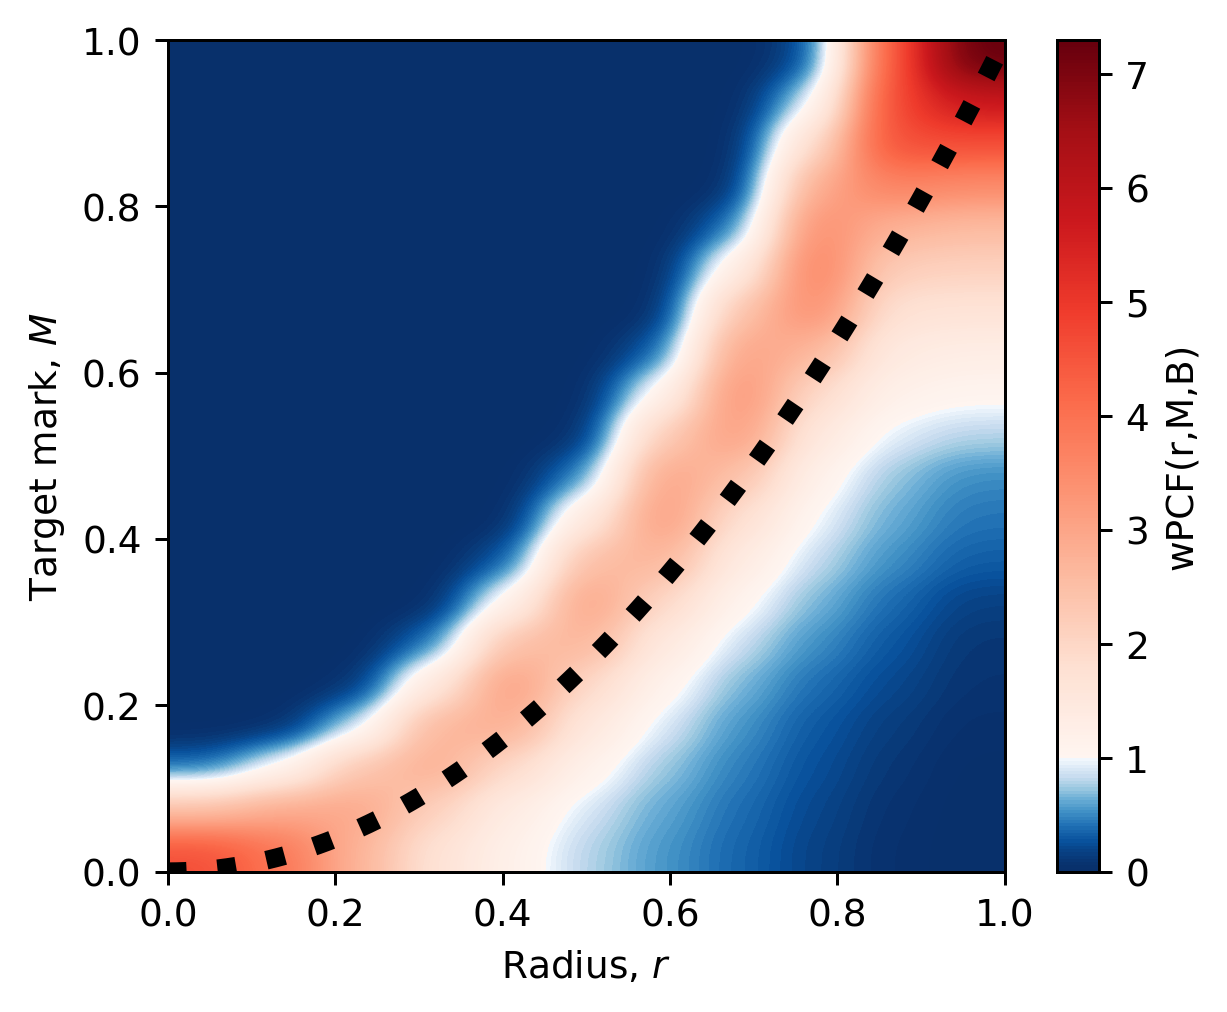

In [9]:
# Visualize the weighted pair correlation function (wPCF)
ms.visualise.visualise_wpcf(radii, wPCF, figure_kwargs={'figsize': (5, 4)})

# Plot the expected value of the target mark M (M = r^2) as a function of r
plt.gca().plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01) ** 2, color=[0, 0, 0], linestyle=':', lw=5)

The black dashed line shows the expected value of the target mark $M$ for which the wPCF is maximised ($M = r^2$), as a function of $r$.